<a href="https://colab.research.google.com/github/vignesh-pala/NLP/blob/master/NLP_Ch11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import reuters
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers,regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers, backend
from keras.utils import np_utils

from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import string
#stop_words = set(stopwords.words('english'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Read input from Google drive
df = pd.read_csv('/content/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [3]:
df.head()

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# check size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
#check for null values
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [6]:
#seperate sentence and labels
sentence = df['sentence'].values
label = df['label'].values
sentence[0]

'Wow... Loved this place.'

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(sentence, label, test_size=0.2, random_state=42)

 * Tokenize and Convert to Sequences


In [35]:
max_words = 1500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
x_train_tkn = tokenizer.texts_to_sequences(X_train)
x_test_tkn = tokenizer.texts_to_sequences(X_test)
print(X_train[1])
print(x_train_tkn[1]) 

An excellent new restaurant by an experienced Frenchman.
[46, 144, 370, 66, 61, 46, 773, 774]


 Pad the vector to have fixed length
 
    Note: the max words in the sentences is only around 25, so set maxlen = 25

In [36]:
maxlen = 25
x_train_pad = preprocessing.sequence.pad_sequences(x_train_tkn, maxlen=maxlen,  padding='post')
x_test_pad = preprocessing.sequence.pad_sequences(x_test_tkn, maxlen=maxlen,  padding='post')

In [19]:
x_train_pad[0]

array([  1, 137,   4,   1, 303, 369,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [32]:
#Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1825

, bias_regularizer=Non

In [113]:
embedding_dim = 50

backend.clear_session()
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(layers.GlobalMaxPooling1D())
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(64, activation='relu'))
#model.add(BatchNormalization())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            91250     
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 128)           32128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 124,679
Trainable params: 124,679
Non-trainable params: 0
_________________________________________________________________


In [114]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
history = model.fit(x_train_pad, y_train,
                    epochs=15,
                    batch_size=64,
                    verbose=True,
                    validation_data=(x_test_pad, y_test),
                    callbacks=[early_stop])

Epoch 1/15
13/13 [==============================] - 0s 21ms/step - loss: 0.8146 - accuracy: 0.5163 - val_loss: 0.8025 - val_accuracy: 0.5550
Epoch 2/15
13/13 [==============================] - 0s 14ms/step - loss: 0.7806 - accuracy: 0.6162 - val_loss: 0.7846 - val_accuracy: 0.4850
Epoch 3/15
13/13 [==============================] - 0s 14ms/step - loss: 0.7417 - accuracy: 0.7075 - val_loss: 0.7577 - val_accuracy: 0.6200
Epoch 4/15
13/13 [==============================] - 0s 15ms/step - loss: 0.6909 - accuracy: 0.7738 - val_loss: 0.7299 - val_accuracy: 0.6200
Epoch 5/15
13/13 [==============================] - 0s 14ms/step - loss: 0.6209 - accuracy: 0.8300 - val_loss: 0.6915 - val_accuracy: 0.6900
Epoch 6/15
13/13 [==============================] - 0s 14ms/step - loss: 0.5257 - accuracy: 0.8838 - val_loss: 0.6412 - val_accuracy: 0.7250
Epoch 7/15
13/13 [==============================] - 0s 14ms/step - loss: 0.4100 - accuracy: 0.9588 - val_loss: 0.5746 - val_accuracy: 0.7700
Epoch 8/15
13

* As we can see in the below graph, the model is overfitting. 
* Tried different techniques like Dropout, Batchnormalization, Regularization, but its not improving the outcome

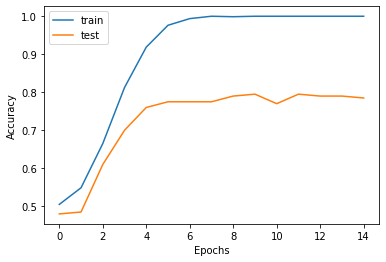

In [95]:
# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

**Appendix**

**References**:

http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras

https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/

uses Glove emedding
https://medium.com/saarthi-ai/sentence-classification-using-convolutional-neural-networks-ddad72c7048c

https://thedatafrog.com/en/articles/sentiment-analysis-convolutional-network/

https://thedatafrog.com/en/articles/text-preprocessing-machine-learning-yelp/


For Future enhancements:

Cleanup text (using below code) and retrain the model.

In [ ]:
stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)

In [ ]:
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()

  #remove punctuations
	tokens = [w.translate(table) for w in tokens]

	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]

	tokens = [w for w in tokens if  w not in stop_words]

	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]

	return tokens

In [ ]:
X_train1 = [clean_doc(t) for t in X_train]
X_test1 = [clean_doc(t) for t in X_test]
X_train1[4]

['Just', 'lunch', 'great', 'experience']